## SMS Spam Classifier

The goal of this project is to create a Spam Classifier for text messages. We would be using the SMS dataset provided by UC Irvine, which can be accessed at:
https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

<br><br>
## Table of Contents
<a href='#1'>
1.Importing Libraries and Dependencies
</a><br>
<a href='#2'>
  2.Basic EDA and Data Cleaning
</a><br>
&nbsp;&nbsp;&nbsp;<a href='#21'>2.1 Renaming and dropping columns</a><br>
&nbsp;&nbsp;&nbsp;<a href='#22'>2.2 Understanding the data set split</a><br>
&nbsp;&nbsp;&nbsp;<a href='#23'>2.3 Further EDA and plotting</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#231'>2.3.1 Lengths of spam messages plot</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#232'>2.3.2 Lengths of non-spam messages plot</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#241'>2.4.1 Top 25 unigrams of spam and non-spam messages plots</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#242'>2.4.2 Top 25 bigrams of spam and non-spam messages plots</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#243'>2.4.3 Top 25 trigrams of spam and non-spam messages plots</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#251'>2.5.1 Wordcloud of spam words plot</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#252'>2.5.2 Wordcloud of non-spam words plot</a><br>
<a href='#3'>3. Splitting the data into training and test sets</a><br>
<a href='#4'>4. Vectorizing the Data using i) CountVectorizer ii)TfidfVectorizer</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#41'>4.1 Stopwords tradeoff</a><br>
<a href='#5'>5. Training the data using various machine learning models</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#51'>5.1 Logistic Regression</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#52'>5.2 Decision Tree Classifier</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#53'>5.3 Random Forest Classifier</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#54'>5.4 Multinomial Naive Bayes Classifier</a><br>
&nbsp;&nbsp;&nbsp;    <a href='#55'>5.5 KNearestNeighbours Classifier</a><br>
<a href='#6'>6. Conclusion</a><br>
<a href='#7'>7. Web-interface and API</a><br>
&nbsp;&nbsp;&nbsp;<a href='#71'>7.1 High level diagram of web-interface and API</a><br>

    
    



<a id='1'></a>
## 1. Importing Libraries and Dependencies

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
import pickle


<a id='2'></a>
## 2. Basic EDA and Data Cleaning

In [82]:
spam_df = pd.read_csv("spam.csv",encoding='latin-1')
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [83]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<a id='21'></a>
## 2.1 Renaming and dropping columns

In [84]:
spam_df = spam_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
spam_df = spam_df.rename(columns={'v1': 'type', 'v2': 'text'})
spam_df = spam_df.replace('ham','non-spam')
spam_df.head(20)

,type,text
0,non-spam,"Go until jurong point, crazy.. Available only ..."
1,non-spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,non-spam,U dun say so early hor... U c already then say...
4,non-spam,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,non-spam,Even my brother is not like to speak with me. ...
7,non-spam,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<a id='22'></a>
## 2.2 Understanding the data set split

In [85]:
spam_df.groupby('type').describe()

text                                                               
         count unique                                                top freq
type                                                                         
non-spam  4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

<a id='23'></a>
## 2.3 Further EDA and plotting

In [86]:
nonspam_words = ''
spam_words = ''
spam = spam_df[spam_df.type == 'spam']
non_spam = spam_df[spam_df.type =='non-spam']

spam_unigram_counter = Counter()
spam_bigram_counter = Counter()
spam_trigram_counter = Counter()
nonspam_unigram_counter = Counter()
nonspam_bigram_counter = Counter()
nonspam_trigram_counter = Counter()


for text in spam.text:
    tokens = nltk.word_tokenize(text)
    spam_unigram_counter.update(Counter(tokens))
    spam_bigram_counter.update(Counter(ngrams(tokens,2)))
    spam_trigram_counter.update(Counter(ngrams(tokens,3)))
    for word in tokens:
        spam_words = spam_words + word + ' '
        
for text in non_spam.text:
    tokens = nltk.word_tokenize(text)
    nonspam_unigram_counter.update(Counter(tokens))
    nonspam_bigram_counter.update(Counter(ngrams(tokens,2)))
    nonspam_trigram_counter.update(Counter(ngrams(tokens,3)))
    for word in tokens:
        nonspam_words = nonspam_words + word + ' '
        
spam_wordcloud = WordCloud(width=800, height=600).generate(spam_words)
nonspam_wordcloud = WordCloud(width=800, height=600).generate(nonspam_words)



<a id='231'></a>
## 2.3.1 Lengths of spam messages plot

(array([  2.,   5.,   6.,  11.,   5.,  18.,  13.,  12.,  26.,  28.,  43.,
         84., 139., 277.,  66.,   9.,   1.,   1.,   0.,   1.]),
 array([ 13.  ,  23.55,  34.1 ,  44.65,  55.2 ,  65.75,  76.3 ,  86.85,
         97.4 , 107.95, 118.5 , 129.05, 139.6 , 150.15, 160.7 , 171.25,
        181.8 , 192.35, 202.9 , 213.45, 224.  ]),
 <a list of 20 Patch objects>)

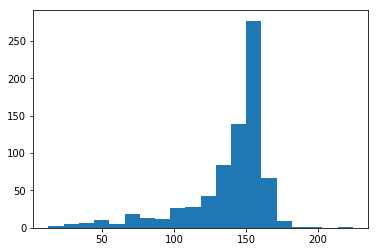

In [87]:
spam_lengths = spam["text"].apply(len)
plt.hist(spam_lengths, bins=20)

<a id='232'></a>
## 2.3.2 Lengths of non-spam messages plot

(array([2.178e+03, 1.456e+03, 6.190e+02, 4.370e+02, 4.800e+01, 2.900e+01,
        2.500e+01, 1.000e+01, 7.000e+00, 7.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2. ,  47.4,  92.8, 138.2, 183.6, 229. , 274.4, 319.8, 365.2,
        410.6, 456. , 501.4, 546.8, 592.2, 637.6, 683. , 728.4, 773.8,
        819.2, 864.6, 910. ]),
 <a list of 20 Patch objects>)

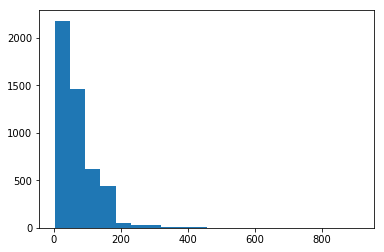

In [88]:
non_spam_lengths = non_spam["text"].apply(len)
plt.hist(non_spam_lengths, bins=20)

<a id='241'></a>
## 2.4.1 Top 25 unigrams of spam and non-spam messages plots

Text(0.5,1,'Top 25 unigrams of spam words')

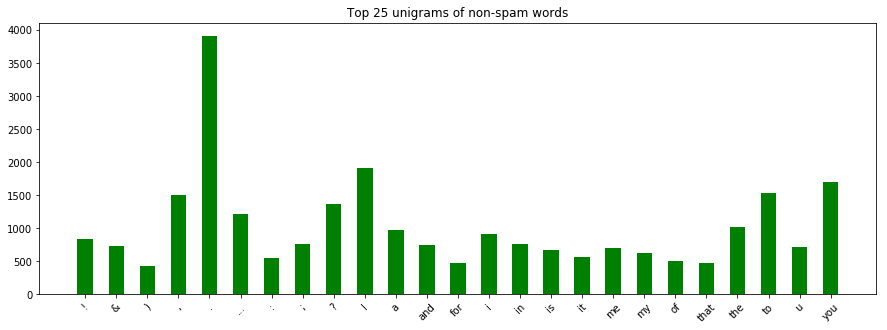

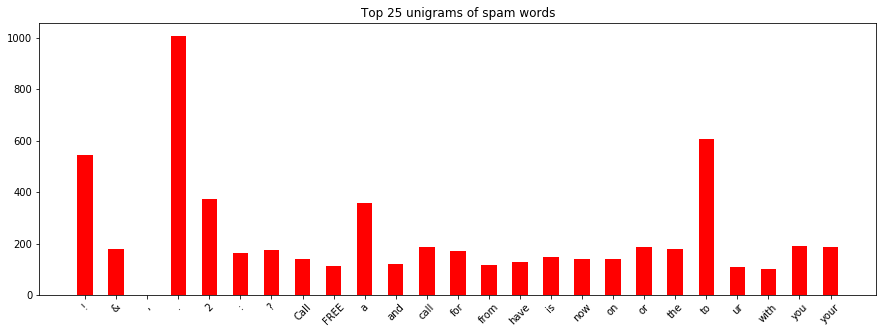

In [89]:
nonspam_unigram_25 = nonspam_unigram_counter.most_common(25)
nonspam_unigram_25_dict = dict((k[0],k[1])for k in nonspam_unigram_25)
plt.figure(figsize=(15,5))
plt.bar(nonspam_unigram_25_dict.keys(),nonspam_unigram_25_dict.values(),width=0.5, color='g')
plt.xticks(rotation=45)
plt.title("Top 25 unigrams of non-spam words")

spam_unigram_25 = spam_unigram_counter.most_common(25)
spam_unigram_25_dict = dict((k[0],k[1])for k in spam_unigram_25)
plt.figure(figsize=(15,5))
plt.bar(spam_unigram_25_dict.keys(),spam_unigram_25_dict.values(),width=0.5, color='r')
plt.xticks(rotation=45)
plt.title("Top 25 unigrams of spam words")

<a id='242'></a>
## 2.4.2 Top 25 bigrams of spam and non-spam messages plots

Text(0.5,1,'Top 25 bigrams of spam words')

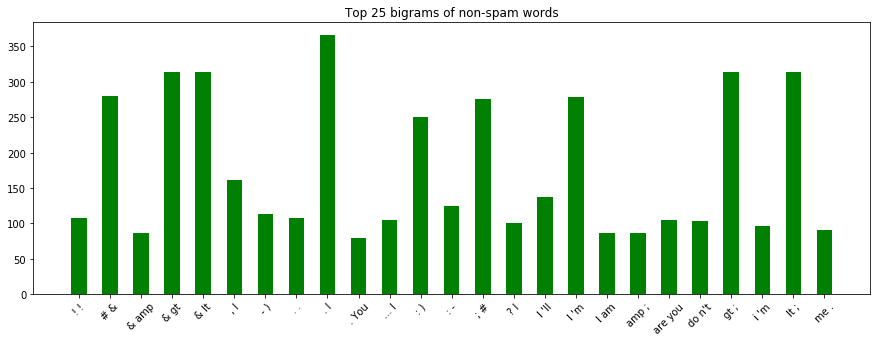

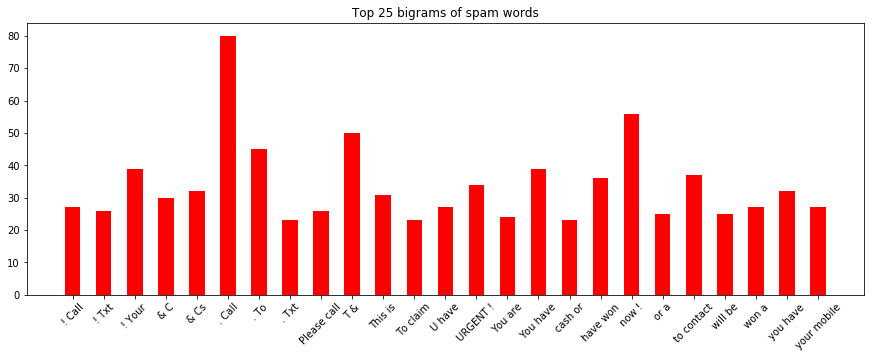

In [90]:
nonspam_bigram_25 = nonspam_bigram_counter.most_common(25)
nonspam_bigram_25_dict = dict((k[0][0]+ ' ' + k[0][1],k[1])for k in nonspam_bigram_25)
plt.figure(figsize=(15,5))
plt.bar(nonspam_bigram_25_dict.keys(),nonspam_bigram_25_dict.values(),width=0.5, color='g')
plt.xticks(rotation=45)
plt.title("Top 25 bigrams of non-spam words")

spam_bigram_25 = spam_bigram_counter.most_common(25)
spam_bigram_25_dict = dict((k[0][0]+ ' ' + k[0][1],k[1])for k in spam_bigram_25)
plt.figure(figsize=(15,5))
plt.bar(spam_bigram_25_dict.keys(),spam_bigram_25_dict.values(),width=0.5, color='r')
plt.xticks(rotation=45)
plt.title("Top 25 bigrams of spam words")

<a id='243'></a>
## 2.4.3 Top 25 trigrams of spam and non-spam messages plots

Text(0.5,1,'Top 25 trigrams of spam words')

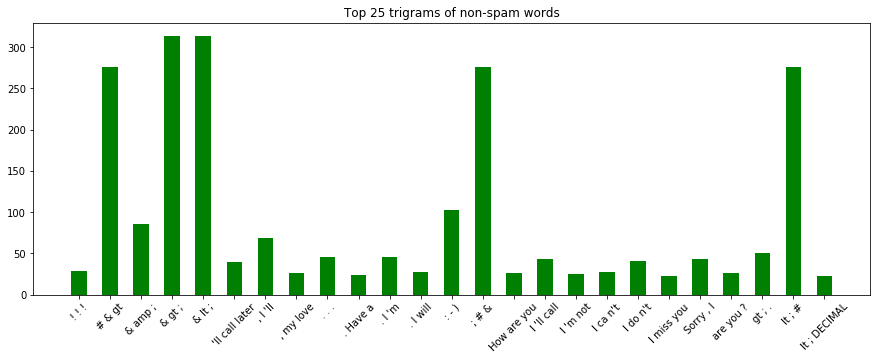

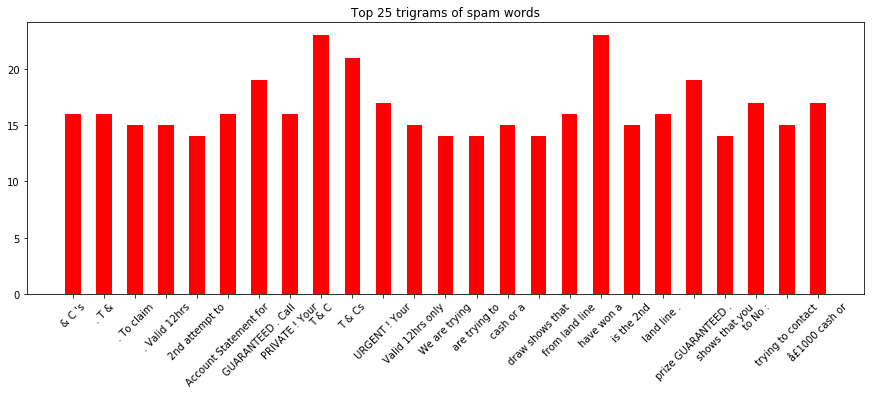

In [91]:
nonspam_trigram_25 = nonspam_trigram_counter.most_common(25)
nonspam_trigram_25_dict = dict((k[0][0]+ ' ' + k[0][1] + ' ' + k[0][2],k[1])for k in nonspam_trigram_25)
plt.figure(figsize=(15,5))
plt.bar(nonspam_trigram_25_dict.keys(),nonspam_trigram_25_dict.values(),width=0.5, color='g')
plt.xticks(rotation=45)
plt.title("Top 25 trigrams of non-spam words")

spam_trigram_25 = spam_trigram_counter.most_common(25)
spam_trigram_25_dict = dict((k[0][0]+ ' ' + k[0][1] + ' ' + k[0][2],k[1])for k in spam_trigram_25)
plt.figure(figsize=(15,5))
plt.bar(spam_trigram_25_dict.keys(),spam_trigram_25_dict.values(),width=0.5, color='r')
plt.xticks(rotation=45)
plt.title("Top 25 trigrams of spam words")

<a id='251'></a>
## 2.5.1 Wordcloud of spam words

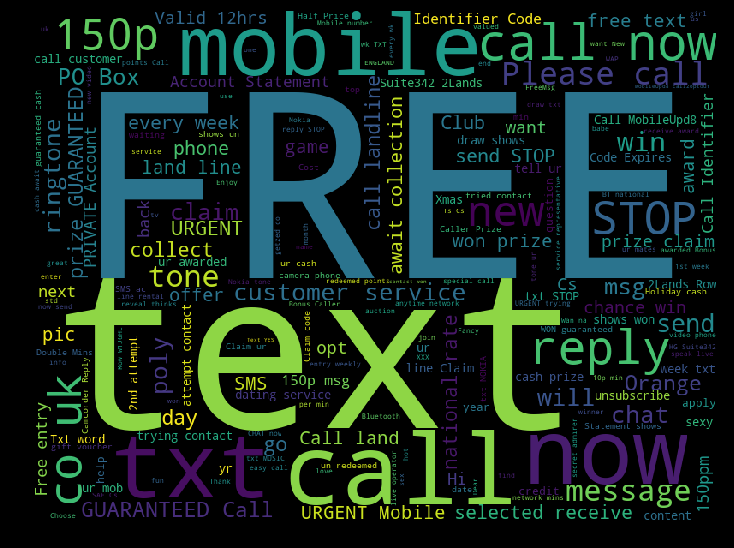

In [92]:
plt.figure( figsize=(10,10), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<a id='252'></a>
## 2.5.2 Wordcloud of non-spam words

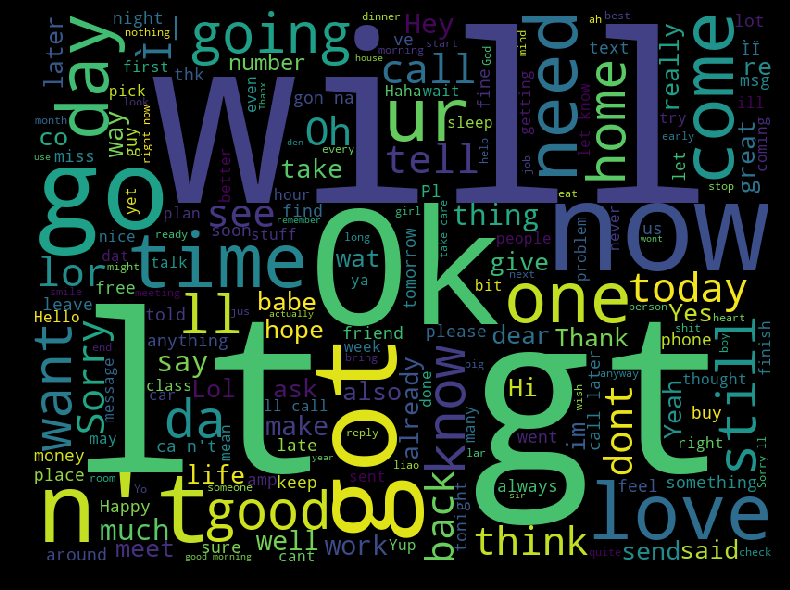

In [93]:
plt.figure( figsize=(12,8), facecolor='k')
plt.imshow(nonspam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<a id='3'></a>
## 3. Splitting the data into training and test sets

In [94]:
trainX,testX,trainY,testY = train_test_split(spam_df['text'],spam_df['type'], test_size = 0.2, random_state = 10)


<a id='4'></a>
## 4. Vectorizing the Data using i) CountVectorizer ii)TfidfVectorizer

In [95]:

cv = CountVectorizer()
cv.fit(trainX)
trainX_cv = cv.transform(trainX)
testX_cv = cv.transform(testX)


tv = TfidfVectorizer("english")
tv.fit(trainX)
trainX_tv = tv.transform(trainX)
testX_tv = tv.transform(testX)



<a id='41'></a>
## 4.1 Stopwords tradeoff
The above vectorizer algorithms have an option to include stop words(words that are filtered out), but we are not exercising that option since a lot of legit SMSs can look something like "how are you?" while a spam SMS may look more "proper" and something like "Free Vacation for your family"

<a id='5'></a>
## 5. Training the data using various machine learning models

<a id='51'></a>
## 5.1 Logistic Regression

In [96]:
model = LogisticRegression()
model.fit(trainX_cv,trainY)
cv_score = accuracy_score(testY,model.predict(testX_cv))


model = LogisticRegression()
model.fit(trainX_tv,trainY)
tv_score = accuracy_score(testY,model.predict(testX_tv))

results = {'Model':['LogisticRegression'],'CountVectorizer':[cv_score],'TfidfVectorizer':[tv_score]}

<a id='52'></a>
## 5.2 Decision Tree Classifier

In [97]:
model = DecisionTreeClassifier()
model.fit(trainX_cv,trainY)
cv_score = accuracy_score(testY,model.predict(testX_cv))


model = DecisionTreeClassifier()
model.fit(trainX_tv,trainY)
tv_score = accuracy_score(testY,model.predict(testX_tv))

results['Model'].append('DecisionTreeClassifier')
results['CountVectorizer'].append(cv_score)
results['TfidfVectorizer'].append(tv_score)



<a id='53'></a>
## 5.3 Random Forest Classifier

In [98]:
model = RandomForestClassifier()
model.fit(trainX_cv,trainY)
cv_score = accuracy_score(testY,model.predict(testX_cv))


model = RandomForestClassifier()
model.fit(trainX_tv,trainY)
tv_score = accuracy_score(testY,model.predict(testX_tv))

results['Model'].append('RandomForestClassifier')
results['CountVectorizer'].append(cv_score)
results['TfidfVectorizer'].append(tv_score)

<a id='54'></a>
## 5.4 Multinomial Naive Bayes Classifier

In [99]:
model_nb = MultinomialNB()
model_nb.fit(trainX_cv,trainY)
cv_score = accuracy_score(testY,model_nb.predict(testX_cv))


model = MultinomialNB()
model.fit(trainX_tv,trainY)
tv_score = accuracy_score(testY,model.predict(testX_tv))

results['Model'].append('MultinomialNBClassifier')
results['CountVectorizer'].append(cv_score)
results['TfidfVectorizer'].append(tv_score)

<a id='55'></a>
## 5.5 KNearestNeighbours Classifier

In [100]:
model = KNeighborsClassifier()
model.fit(trainX_cv,trainY)
cv_score = accuracy_score(testY,model.predict(testX_cv))


model = KNeighborsClassifier()
model.fit(trainX_tv,trainY)
tv_score = accuracy_score(testY,model.predict(testX_tv))

results['Model'].append('KNeighborsClassifier')
results['CountVectorizer'].append(cv_score)
results['TfidfVectorizer'].append(tv_score)

In [101]:
results_df = pd.DataFrame(data=results)
results_df = results_df[['Model','CountVectorizer','TfidfVectorizer']]
results_df

,Model,CountVectorizer,TfidfVectorizer
0,LogisticRegression,0.980269,0.966816
1,DecisionTreeClassifier,0.971300,0.954260
2,RandomForestClassifier,0.970404,0.964126
3,MultinomialNBClassifier,0.988341,0.959641
4,KNeighborsClassifier,0.912108,0.904036


<a id='6'></a>
## 6. Conclusion

([<matplotlib.axis.XTick at 0x11996fb38>,
 <a list of 5 Text xticklabel objects>)

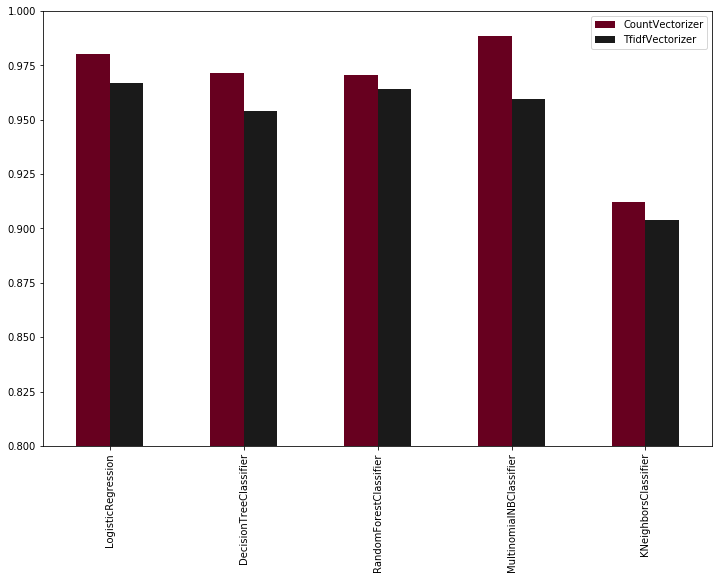

In [102]:
results_df.plot(kind='bar', ylim=(0.80,1.0), figsize=(12,8), align='center', colormap="RdGy")
plt.xticks(np.arange(5), results_df.Model)

## As we can see above, Multinomial Naive Bayes classifier with CountVectorizer gives us the best results.

<a id='7'></a>
## 7. Web-interface and API
Preparing to store and download trained variables.

In [105]:
pickle.dump(model_nb, open('nbmodel.pkl', 'wb'))
pickle.dump(cv, open('cv.fit', 'wb'))

<b>Links:<b><br/>
    <a href='http://192.241.231.87/spamsent'>1. Web-interface</a><br/>
    <a href='http://192.241.231.87/spamsent/api.html'>2. API</a>

<a id='71'></a>
## 7.1 High-level diagram of web-interface and API

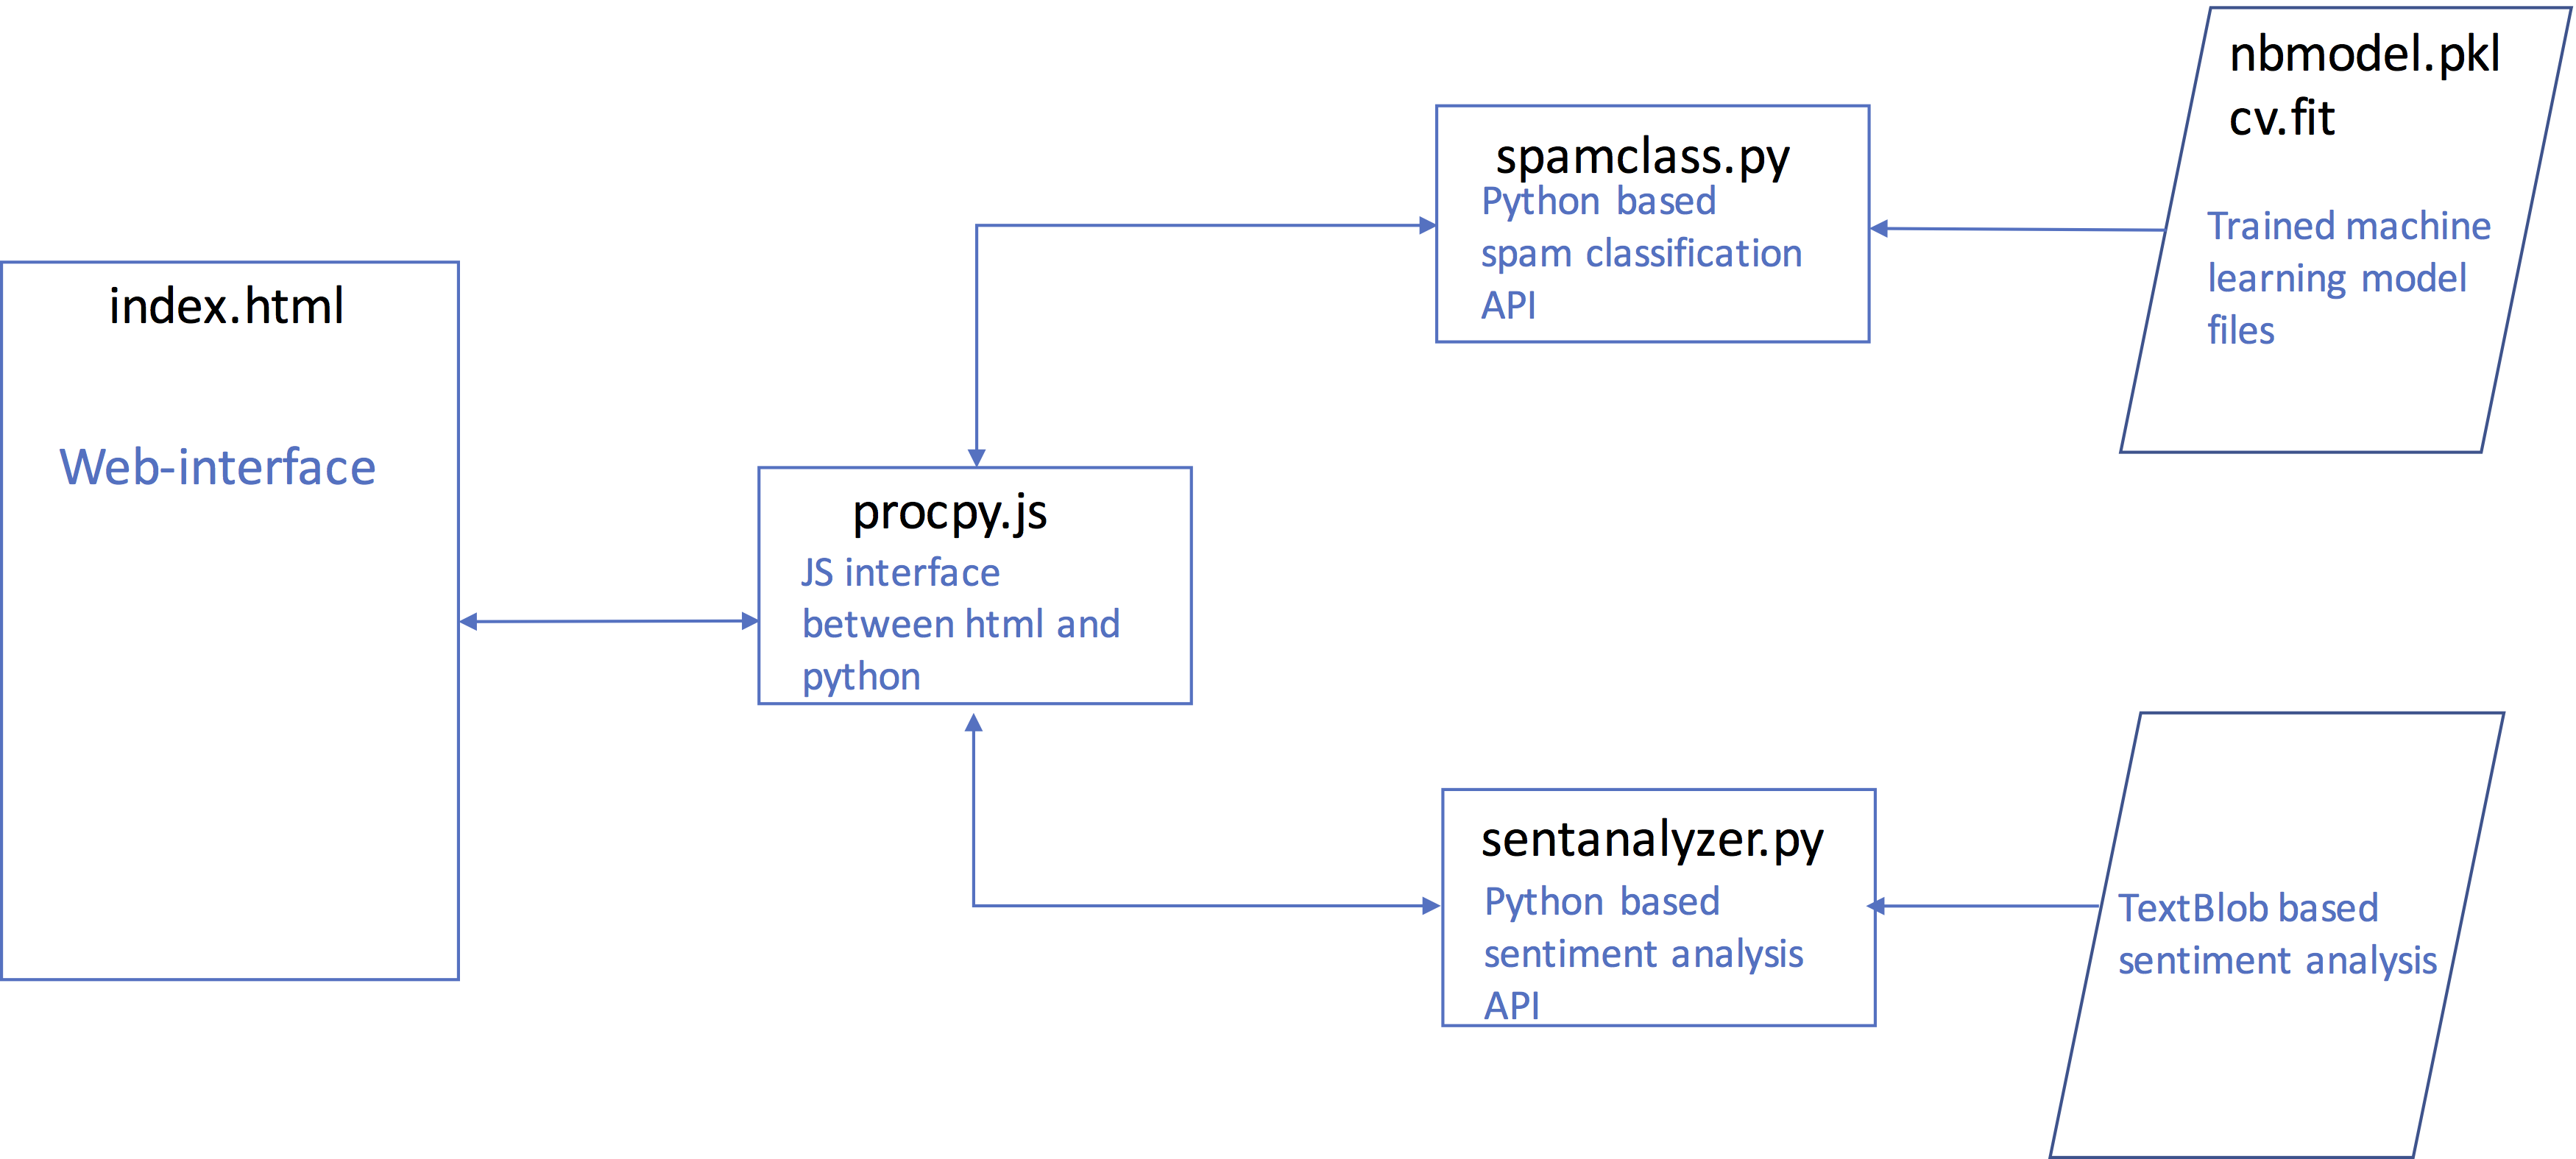